**Introduction**

After you train a machine learning model, the next thing to do is showcase it to the world by making a demo. Currently, the easiest way to do so is with Gradio, hosting on HuggingFace Spaces. With the Gradio framework deployed on Spaces, it takes <10 minutes to deploy a model! Let's see how we can easily deploy a model for the world to try out with these platforms. We will use a classic CNN pet classifier as an example.

**Preliminaries: Training a pet classifier**

We need to have a model to actually demo! Let's quickly train a simple ResNet50 pet classifier on the Oxford Pets dataset using fastai
**https://www.robots.ox.ac.uk/~vgg/data/pets/**



In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
dls = ImageDataLoaders.from_name_re(path, get_image_files(path/'images'), pat='(.+)_\d+.jpg', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))
learn = vision_learner(dls, models.resnet50, metrics=accuracy)
learn.fine_tune(1)
learn.path = Path('.')
learn.export()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 122MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.941368,0.313515,0.908660,59:39


epoch,train_loss,valid_loss,accuracy,time
0,0.425042,0.241636,0.927605,1:23:19


**Using Gradio**

Let's see how to make a demo web app with Gradio. First let's load our model:



In [2]:
learn = load_learner('export.pkl')

Next, let's define a prediction function our model:



In [3]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

Finally, let's import Gradio and use it's functionality to make an interface and launch it. Note that if you are doing this from a notebook, the Gradio demo will also show up within the notebook for you to try interactively (here I just show screenshots).

In [8]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)


<ipython-input-8-64ba4e9a0071>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)
<ipython-input-8-64ba4e9a0071>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)
<ipython-input-8-64ba4e9a0071>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)
<ipython-input-8-64ba4e9a0071>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Labe

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://088a057e53783e1daf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


That's it! The actual creation of the demo takes one line!



All Gradio interfaces are created by constructing a gradio.Interface() object. As you can see in this example, the Interface object takes in the function that we want to make an interface for (usually an ML model inference function), Gradio input components (the number of input components should match the number of parameters of the provided function), and Gradio output components (the number of output components should match the number of values returned by the provided function). Gradio provides components for various types of input and output types. This includes: images (upload, draw, or webcam), video, audio (upload or microphone), textboxes, dataframes, timeseries, generic files, and more! So you should be able to create a Gradio demo for virtually any type of ML task you can think of!

After the gradio.Interface() object is defined, the interface is launched with the launch method.

## **Customizing our Gradio app**





First of all, we can pass in a title and description for our app which goes at the top before our input and output components:

In [ ]:
title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."

Another interesting feature that Gradio has is the ability for interpretation so that users can understand what parts of the input are responsible for the output. We'll use the default interpretation function provided by Gradio but you can use your own as well:



In [ ]:
interpretation='default'

Note that the default interpretation function needs scikit-image to be installed. More information on the interpretation feature is provided here.

Gradio also provides a screenshotting feature that can make it really easy to share your examples and results with others. It is enabled by default.

Finally, Gradio also supports serving of inference requests with a queue. This can be helpful when your app receives a significant amount of traffic. We'll enable a queue here:

In [ ]:
enable_queue=True

Let's put it all together and make our interface with these additional features:



In [9]:
gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,interpretation=interpretation,enable_queue=enable_queue).launch(share=True)


<ipython-input-9-3dddda7b2000>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,interpretation=interpretation,enable_queue=enable_queue).launch(share=True)
<ipython-input-9-3dddda7b2000>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,interpretation=interpretation,enable_queue=enable_queue).launch(share=True)
<ipython-input-9-3dddda7b2000>:1: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  gr.Interface(fn=predict,inputs=gr.inputs.Image(shap

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1d73ef133eff553a25.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Let's put everything in a "aap.py" file

In [ ]:
import gradio as gr
from fastai.vision.all import *
import skimage

learn = load_learner('export.pkl')

labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."
examples = ['bengal_cat.jpeg','bombay_cat.jpeg']
interpretation='default'
enable_queue=True

gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch()

## **Hugging Face**

Using HuggingFace Spaces
HuggingFace Spaces is a free-to-use platform for hosting machine learning demos and apps. The Spaces environment provided is a CPU environment with 16 GB RAM and 8 cores. It currently supports the Gradio and Streamlit platforms. Here we will make a Space for our Gradio demo.

In order to be able to create a HuggingFace Space, you need to have a HuggingFace account. You can sign up for free here. After signing up, you can create a Space by clicking "New Space" on the navigation menu (press on your profile image).

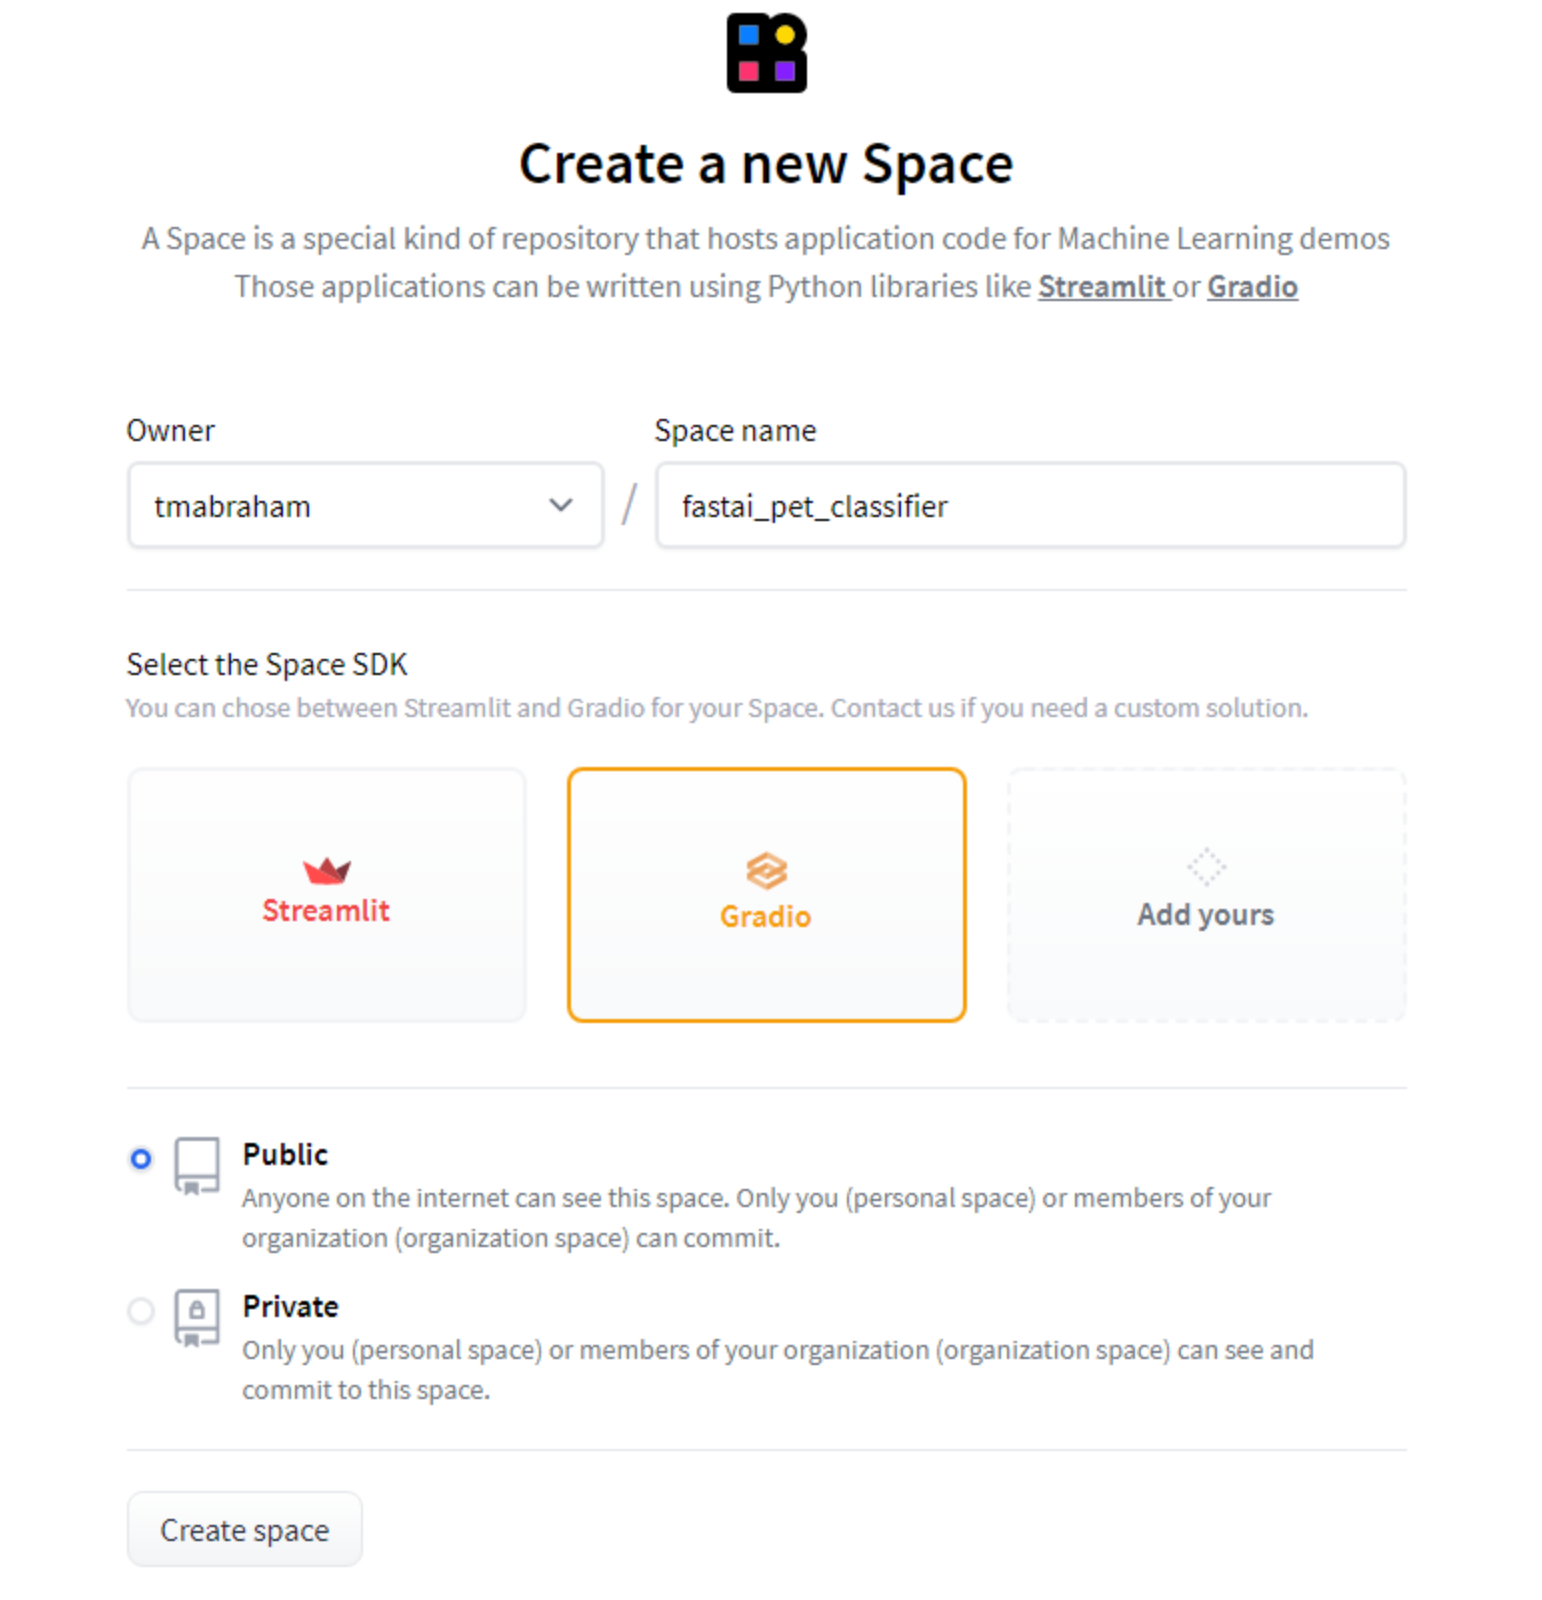

After creating the HuggingFace Space, we need to copy the git command to clone the repositery to the local directory. For mac, open the terminal and type the clone command "git clone https://huggingface.co/spaces/jatinm2593/ml_demo"

After that,I used Visual studio to create **app.py** from which the demo will be created and will add this file to the huggingfac space directory. Use git add , git commit & git push to add the file the space directory

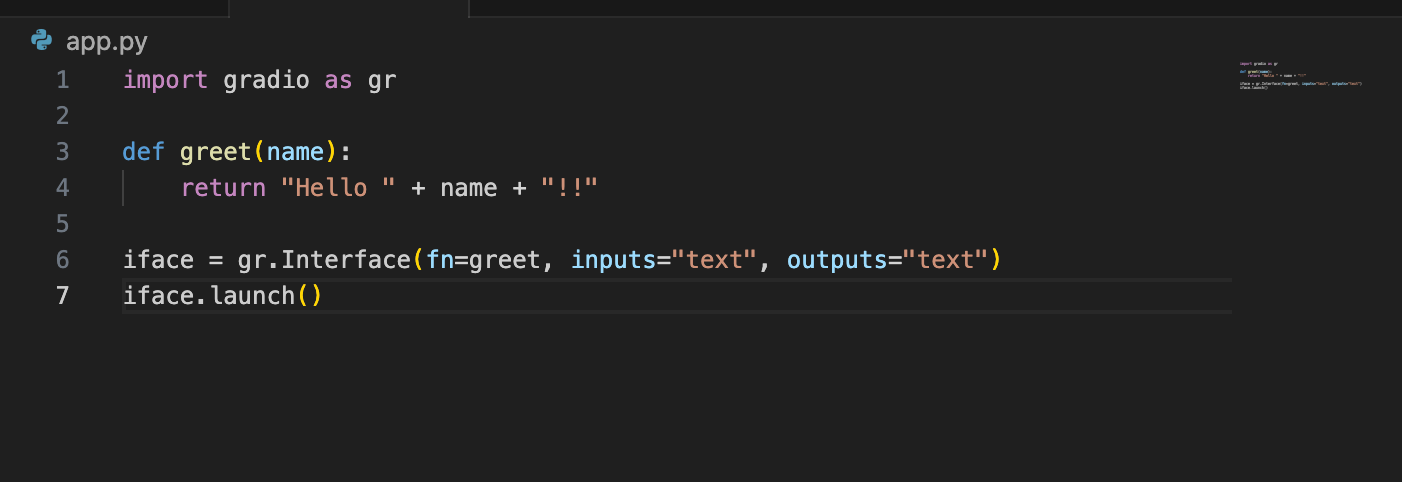


Add the app.py, requirements.txt, export.pkl, and examples files,

Requirement.txt will have "fastai" and "scikit-image" libraries required for this code to run.
Export.pkl is the model
Example files are the sample images to put in the demo
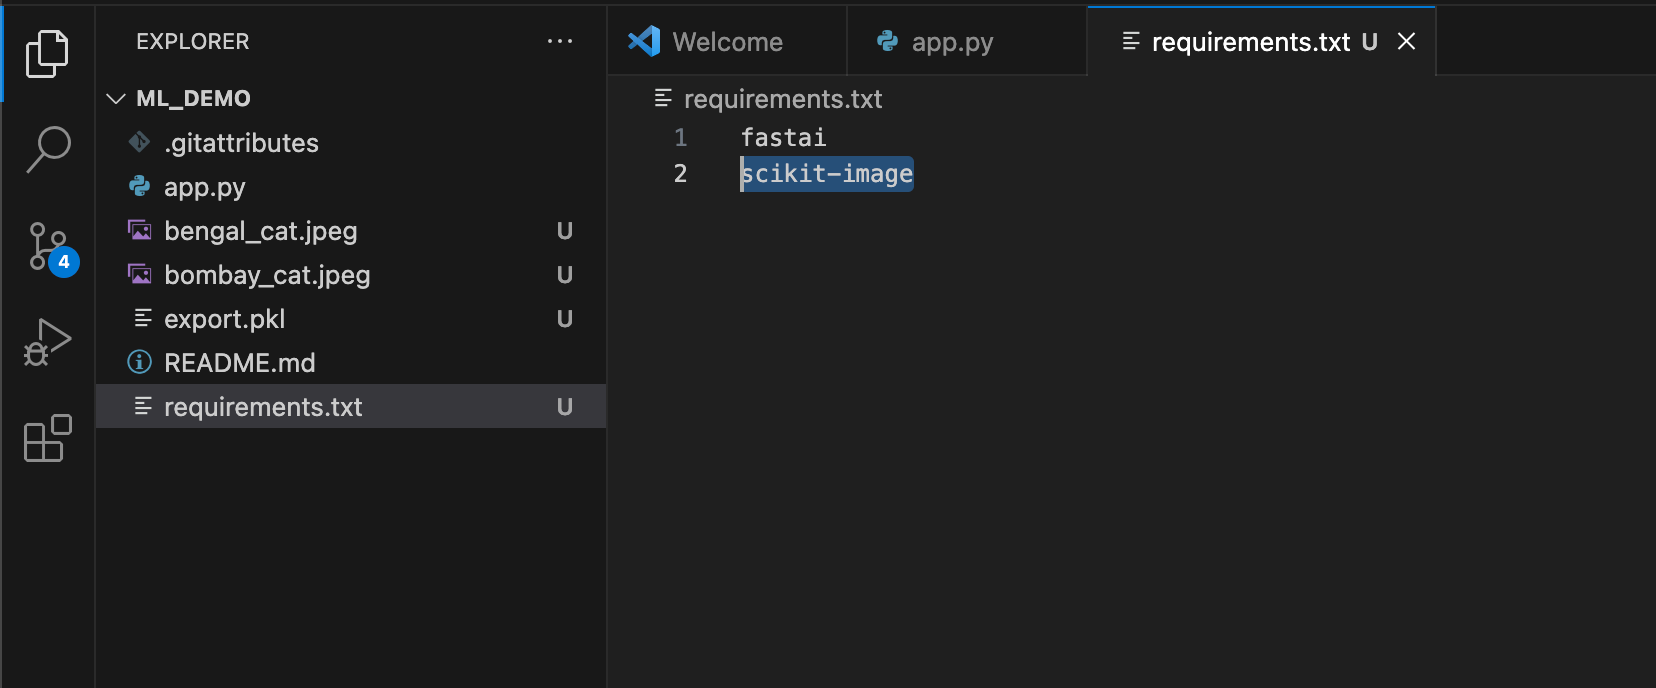

the files can be uploaded via the Spaces UI. When you go to your Space, under "Files and versions", there is an "Add files" button which you can use to upload your app files.

After a few moments, during which the app is being built, our demo should show up on the HuggingFace Space.

That's it! In a few minutes, you trained a pet classifier model with fastai, made a demo interface with Gradio, and hosted it for free on a HuggingFace Space! You can try it out right below or you can try it out on HuggingFace Spaces https://huggingface.co/spaces/jatinm2593/ml_demo

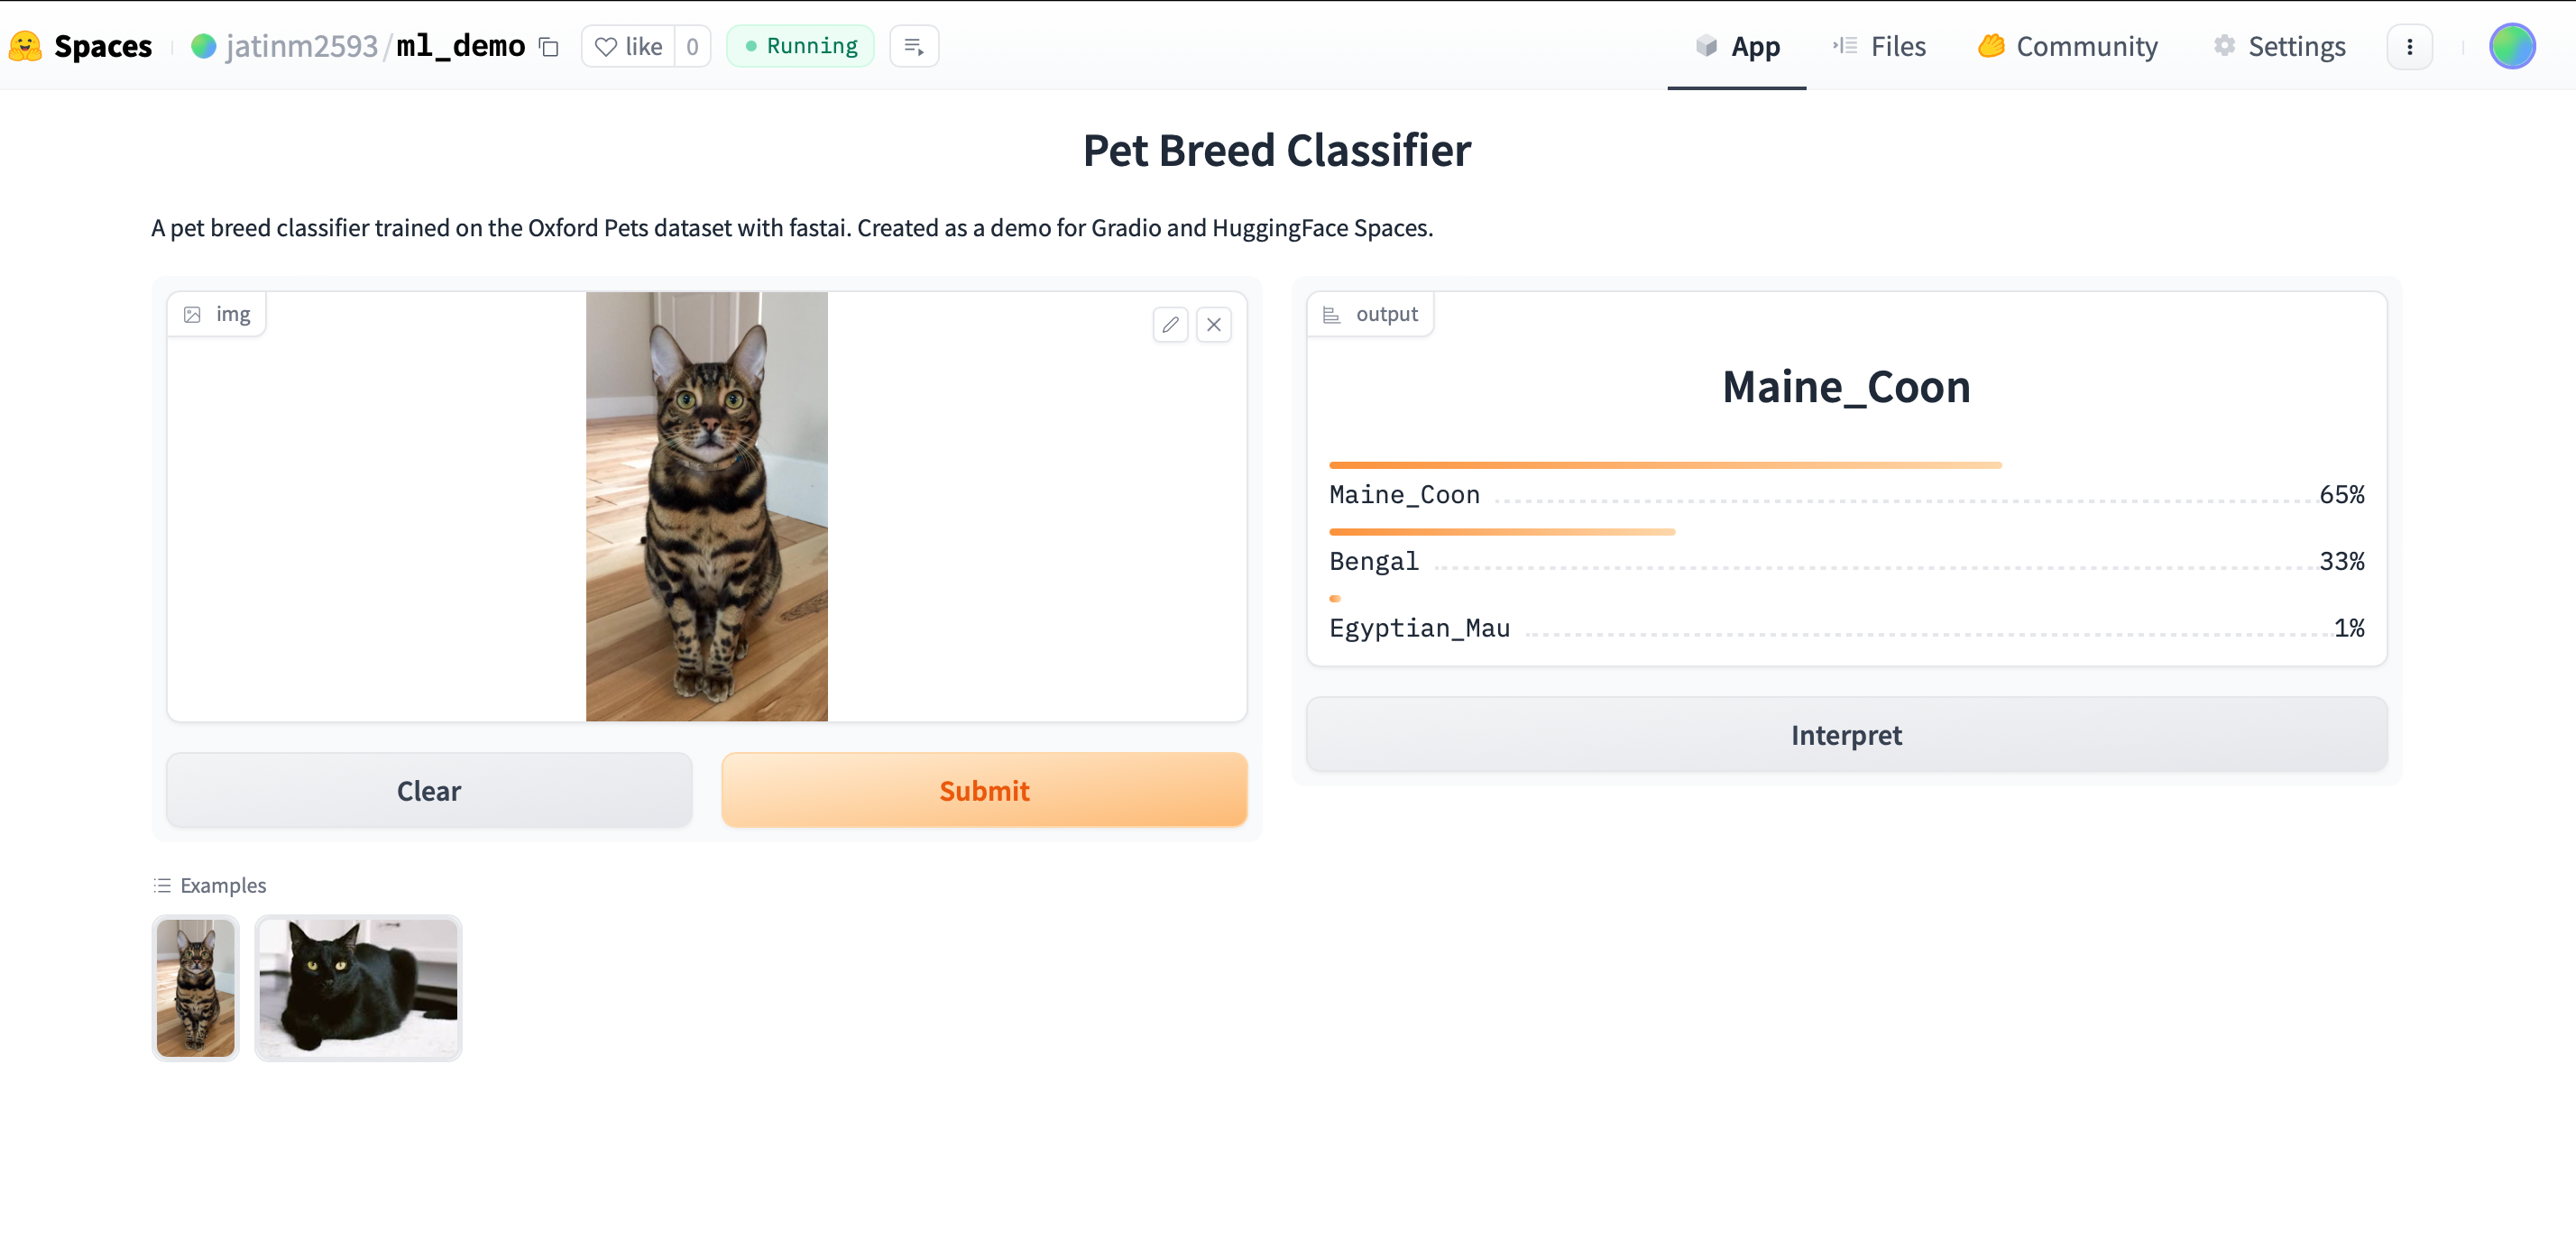